In [16]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('/Users/ellen/GitHub/DeepLearningProjects/dataset/mnist.npz')

In [19]:
X_train.shape

(60000, 28, 28)

In [20]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [21]:
X_train.shape

(60000, 28, 28, 1)

In [22]:
y_train_cat.shape

(60000, 10)

In [23]:
y_train_cat[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [24]:
from keras.layers import MaxPool2D, AvgPool2D
from keras.layers import Flatten, Activation
from keras.layers import Conv2D

from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

In [37]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

In [39]:
h = model.fit(X_train, y_train_cat, batch_size=128,
          epochs=10, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 48s - loss: 0.2308 - acc: 0.9293 - val_loss: 0.0722 - val_acc: 0.9787
Epoch 2/10
48000/48000 [==============================] - 45s - loss: 0.0613 - acc: 0.9817 - val_loss: 0.0604 - val_acc: 0.9830
Epoch 3/10
48000/48000 [==============================] - 46s - loss: 0.0406 - acc: 0.9877 - val_loss: 0.0434 - val_acc: 0.9876
Epoch 4/10
48000/48000 [==============================] - 46s - loss: 0.0291 - acc: 0.9911 - val_loss: 0.0391 - val_acc: 0.9882
Epoch 5/10
48000/48000 [==============================] - 46s - loss: 0.0225 - acc: 0.9926 - val_loss: 0.0410 - val_acc: 0.9891
Epoch 6/10
48000/48000 [==============================] - 46s - loss: 0.0174 - acc: 0.9944 - val_loss: 0.0375 - val_acc: 0.9906
Epoch 7/10
48000/48000 [==============================] - 46s - loss: 0.0135 - acc: 0.9960 - val_loss: 0.0378 - val_acc: 0.9901
Epoch 8/10
48000/48000 [==============================

In [28]:
test_acc = model.evaluate(X_test, y_test_cat)

 9952/10000 [============================>.] - ETA: 0s

In [29]:
test_acc

[0.059311796052381398, 0.98009999999999997]

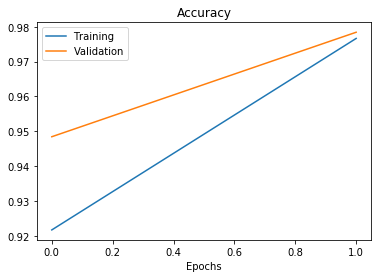

In [30]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])

plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')